In [1]:
# 0 또는 1. 부정 아니면 긍정. 이진 분류 문제
import keras
print(keras.__version__)

2.9.0


In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # 1만개의 단어만 사용하겠다. keras 제공 기능

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
print(train_data.shape) # 학습용 데이터 모양 확인

(25000,)


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(train_labels[0])

1


In [6]:
# 숫자 데이터가 원래 단어로는 뭐였을까?
word_index = imdb.get_word_index()
word_index.items()
reverse_word_index = dict([value, key] for (key, value) in word_index.items())
# word_index -> {key:value}
# dict 개체로 들어갈 때 key와 value 위치가 바뀜
# 뒤집힌 상태 : 앞 숫자, 뒤 문자 --> 하단부의 .get(i-3, '?') 부분에 적용함

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
# 디코딩을 해보자
# 뒤 for i in에 해당하는 데이터를 찾아봄
# i-3은 앞의 쓸모없는 기호 제외(해당 데이터 부분의 index 0,1,2까지는 특수문자로 되어있음)
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [8]:
type(reverse_word_index)

dict

In [9]:
# 데이터 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension)) # 25000행 10000열짜리 데이터
    
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1

    return results

# data encoding
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [10]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [11]:
#[외전]enumerate : 반복 가능한 객체를 만들기 위한 함수. index를 만들어 낼 때 사용 가능
for i, c in enumerate(['A','B','C'],start=1): # start=1은 inex 시작값을 1부터 하겠다.
    print(i,c)

1 A
2 B
3 C


In [12]:
#[외전]
temp = enumerate(['A','B','C'])
# enumerate 타입은 내부적으로는 tuple 타입으로 동작함
# next는 한 칸씩 옆으로 넘기는 명령어
next(temp)
next(temp)
next(temp)

(2, 'C')

In [21]:
# 신경망 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [22]:
# model compile
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), # overfitting 방지를 위해 일부 제약 조건을 걺걺
              loss='binary_crossentropy', # 이진 분류 시 사용하는 loss
              metrics=['accuracy'])

In [23]:
# 데이터를 더 쪼개보자
# train, validation을 병행해서 완성도를 높임임
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 44ms/step - loss: 0.4897 - accuracy: 0.8005 - val_loss: 0.4103 - val_accuracy: 0.8278
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2938 - accuracy: 0.9027 - val_loss: 0.2987 - val_accuracy: 0.8895
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2175 - accuracy: 0.9292 - val_loss: 0.2810 - val_accuracy: 0.8876
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1743 - accuracy: 0.9451 - val_loss: 0.2897 - val_accuracy: 0.8837
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1391 - accuracy: 0.9575 - val_loss: 0.3074 - val_accuracy: 0.8779
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1181 - accuracy: 0.9638 - val_loss: 0.3049 - val_accuracy: 0.8832
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.0975 - accuracy: 0.9707 - val_loss: 0.3375 - val_accuracy: 0.8756
Epoch 8/20
30

In [17]:
# 실험 결과 데이터 가져오기
acc = history.history['accuracy'] # 정확도의 값
val_acc = history.history['val_accuracy'] # 검증 정확도의 값
loss = history.history['loss'] # 손실값
val_loss = history.history['val_loss'] # 검증 손실값
epochs = range(1,len(acc)+1) # 반복 횟수

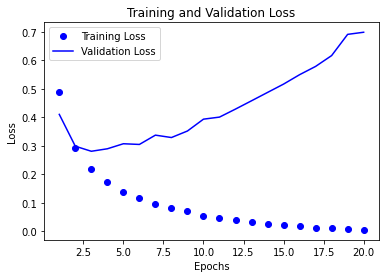

In [18]:
# 실험 결과 시각화
import matplotlib.pyplot as plt
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b-',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# 학습을 하면 할수록 오류(=손실값=loss)가 줄어드는 것을 훈련 데이터에 대해서 확인할 수 있음.
# 단, 과적합되어 다른 일반적인 데이터에 대해서는 안 맞는 모습을 보여줌(검증 정확도의 중요성)

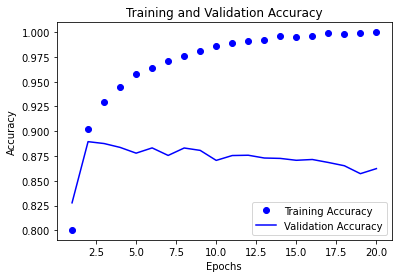

In [19]:
plt.plot(epochs,acc,'bo',label='Training Accuracy')
plt.plot(epochs, val_acc, 'b-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [24]:
# 위의 keras 모델 생성 초기화 하고 본 셀 재실행
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=3,
                    batch_size=256,
                    validation_data=(x_val,y_val))

Epoch 1/3
59/59 [==============================] - 2s 19ms/step - loss: 0.4660 - accuracy: 0.8171 - val_loss: 0.3494 - val_accuracy: 0.8650
Epoch 2/3
59/59 [==============================] - 1s 13ms/step - loss: 0.2539 - accuracy: 0.9128 - val_loss: 0.2968 - val_accuracy: 0.8799
Epoch 3/3
59/59 [==============================] - 1s 11ms/step - loss: 0.1835 - accuracy: 0.9369 - val_loss: 0.2774 - val_accuracy: 0.8896
